## Data Preview 1 mock data collections

This notebook presents two Data Preview 1 (DP1) mock data collections available in the HATS format. We will walk you through on how to load, preview and work with this data in preparation for the official data release by the Rubin Observatory.

#### How was this data generated?

The dummy data was generated with a simple [Python script](https://github.com/lsst-sitcom/linccf/blob/main/internal/LSSTCam_init/Mock_DP1_generation.ipynb) that randomizes fields according to partition-level min/max-values.

### Table of contents

- Which observatory data products were imported?
- How to visualize the distribution of the data?
- How to visualize the catalog metadata and schema?
- How to load individual files with a parquet reader?
- How to work with the full catalog with LSDB?

In [ ]:
%pip install lsdb --quiet

In [2]:
from upath import UPath
base_path = UPath("https://data.lsdb.io/hats/mock_dp1")

#### Which observatory data products were imported?

The Data Preview 1 mock data collections were generated based on [DRP v29_0_0_rc5](https://rubinobs.atlassian.net/browse/DM-49865). They contain **DUMMY** data in the same format and with the same data types as the upcoming Rubin Data Preview 1 HATS catalogs.

The available collections are `dia_object_collection` and `object_collection`.

```text
mock_dp1
├── dia_object_collection
│   ├── collection.properties
│   ├── dia_object_lc
│   ├── dia_object_lc_5arcs
│   └── dia_object_lc_diaObjectId
└── object_collection
    ├── collection.properties
    ├── object_lc
    ├── object_lc_5arcs
    └── object_lc_objectId
```

Each collection contains a main object catalog with time-domain data, and two auxiliary catalogs: a margin cache catalog and an index catalog. The data of interest resides in the main catalogs, named *dia_object_lc* and *object_lc*, and they contain light curve information.

- `dia_object_lc` contains data obtained from difference imaging. To create this catalog we joined the data for each *dia_object* with the respective detections in *dia_source* and *dia_forced_source*.

- `object_lc` contains data obtained from science imaging. To create this catalog we joined the data for each *object* with the respective detections in *forced_source*. There is no association between *source* and *object*.

Powered by [**nested-pandas**](https://nested-pandas.readthedocs.io/en/stable/), the objects' light curve information can be loaded, previewed and processed within a single data structure.

#### How to visualize the distribution of the data?

The metadata allows us to visualize the distribution of the data quickly and without any compute. Using the `hats` package we can plot the HEALPix distribution in a mollweide view as well as observe a higher order Multi-Order-Coverage (MOC) map of where the data is in the sky.

(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - object_lc'}>)

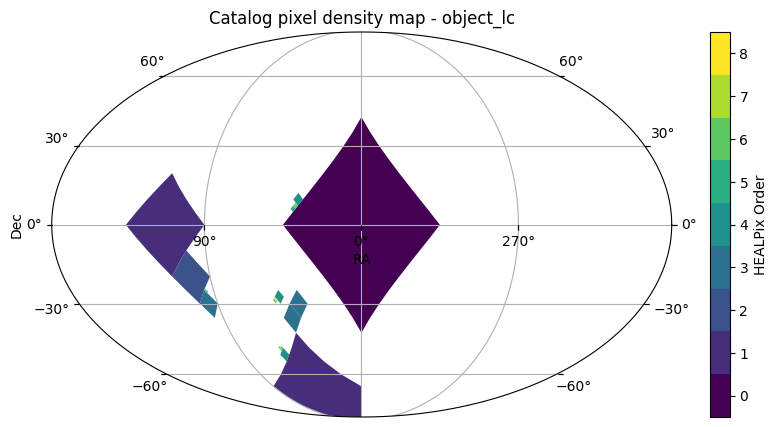

In [3]:
import hats
object_lc = hats.read_hats(base_path / "object_collection").main_catalog
object_lc.plot_pixels()

(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Coverage MOC of object_lc'}>)

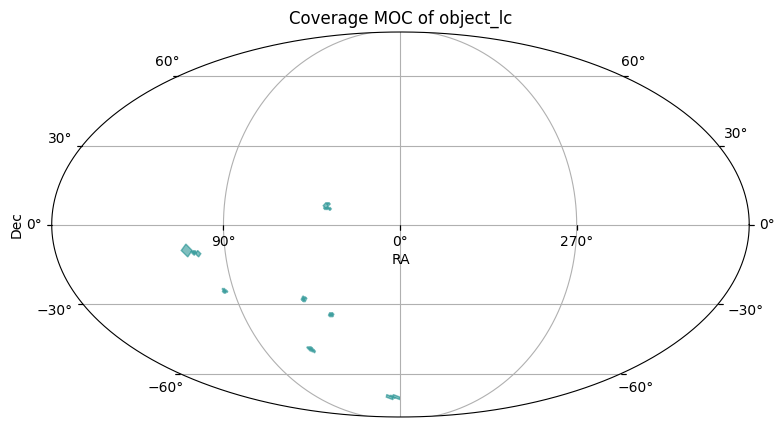

In [4]:
object_lc.plot_moc()

#### How to visualize the catalog metadata and schema?

The catalogs' metadata and schema (columns and their data types) can be found in their HATS object.

In [5]:
# The catalog's arrow schema
object_lc.original_schema

objectId: int64
refFwhm: float
shape_flag: bool
parentObjectId: int64
x: double
y: double
xErr: float
yErr: float
shape_yy: float
shape_xx: float
shape_xy: float
coord_ra: double
coord_dec: double
coord_raErr: float
coord_decErr: float
tract: int64
patch: int64
detect_isIsolated: bool
u_psfFlux: float
u_psfFluxErr: float
u_kronFlux: float
u_kronFluxErr: float
u_kronRad: float
g_psfFlux: float
g_psfFluxErr: float
g_kronFlux: float
g_kronFluxErr: float
g_kronRad: float
r_psfFlux: float
r_psfFluxErr: float
r_kronFlux: float
r_kronFluxErr: float
r_kronRad: float
i_psfFlux: float
i_psfFluxErr: float
i_kronFlux: float
i_kronFluxErr: float
i_kronRad: float
z_psfFlux: float
z_psfFluxErr: float
z_kronFlux: float
z_kronFluxErr: float
z_kronRad: float
y_psfFlux: float
y_psfFluxErr: float
y_kronFlux: float
y_kronFluxErr: float
y_kronRad: float
u_psfMag: float
u_psfMagErr: float
u_kronMag: float
u_kronMagErr: float
g_psfMag: float
g_psfMagErr: float
g_kronMag: float
g_kronMagErr: float
r_psfMag: fl

In [6]:
# Other provenance information
dict(object_lc.catalog_info)

{'catalog_name': 'object_lc',
 'catalog_type': 'object',
 'total_rows': 2284295,
 'ra_column': 'coord_ra',
 'dec_column': 'coord_dec',
 'default_columns': None,
 'primary_catalog': None,
 'margin_threshold': None,
 'primary_column': None,
 'primary_column_association': None,
 'join_catalog': None,
 'join_column': None,
 'join_column_association': None,
 'contains_leaf_files': None,
 'indexing_column': None,
 'extra_columns': None,
 'npix_suffix': '.parquet',
 'hats_max_rows': '300000',
 'hats_order': '6',
 'moc_sky_fraction': '0.13696',
 'hats_builder': 'hats-import v0.5.0',
 'hats_creation_date': '2025-04-09T18:00UTC',
 'hats_estsize': '522346',
 'hats_release_date': '2024-09-18',
 'hats_version': 'v0.1'}

#### How to load individual files with a parquet reader?

We can load individual data files with any parquet-compatible file reader (e.g. `pyarrow.parquet`).

In [7]:
# Grab a single file from the object catalog
single_parquet = base_path / "object_collection/object_lc/dataset/Norder=3/Dir=0/Npix=562.parquet"

In [8]:
import fsspec
import pyarrow.parquet as pq

# With the help of fsspec we can read using HTTPS
with fsspec.open(single_parquet.path, "rb") as f:
    partition = pq.read_table(f).to_pandas()
partition.head()

,objectId,refFwhm,shape_flag,parentObjectId,x,y,xErr,yErr,shape_yy,shape_xx,...,z_psfMag,z_psfMagErr,z_kronMag,z_kronMagErr,y_psfMag,y_psfMagErr,y_kronMag,y_kronMagErr,objectForcedSource,_healpix_29
0,1766444594859345682,0.803710,True,1123250344850402376,3701.617045,27040.177278,564.957642,7132.233398,581.587524,850.973267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'parentObjectId': [0], 'coord_ra': [40.278761...",2531224566116083971
1,1766444594859345691,0.961531,True,246095280433556643,23976.356455,24076.761485,1149.696777,6941.537109,121.362221,535.332703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'parentObjectId': [0], 'coord_ra': [40.292121...",2531137803629545538
2,1766444594859345704,0.571788,False,232096325273583958,24014.041560,19466.438217,908.965820,3885.411865,555.857361,66.505569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'parentObjectId': [0], 'coord_ra': [39.259729...",2531142719904996292
3,1766444594859345707,0.566421,True,1681944145981890257,22052.377672,9058.846858,2332.616211,3599.729980,685.477539,331.317932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'parentObjectId': [0], 'coord_ra': [40.010064...",2531231254300180046
4,1766444594859345711,1.069099,True,1240753650619763401,28173.568498,10333.392095,5346.517090,5303.841309,578.089355,465.464264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'parentObjectId': [0], 'coord_ra': [38.949713...",2531168835813444207


There is a nested column with light curve information (*objectForcedSource*). We recommend **nested-pandas** for reading files in this format.

In [9]:
from nested_pandas import read_parquet
nested_df = read_parquet(single_parquet)
nested_df.head()

objectId   refFwhm shape_flag       parentObjectId  \
0  1766444594859345682   0.80371       True  1123250344850402376   
1  1766444594859345691  0.961531       True   246095280433556643   
2  1766444594859345704  0.571788      False   232096325273583958   
3  1766444594859345707  0.566421       True  1681944145981890257   
4  1766444594859345711  1.069099       True  1240753650619763401   

              x             y         xErr         yErr    shape_yy  \
0   3701.617045  27040.177278   564.957642  7132.233398  581.587524   
1  23976.356455  24076.761485  1149.696777  6941.537109  121.362221   
2   24014.04156  19466.438217    908.96582  3885.411865  555.857361   
3  22052.377672   9058.846858  2332.616211   3599.72998  685.477539   
4  28173.568498  10333.392095   5346.51709  5303.841309  578.089355   

     shape_xx  ...  z_kronMag  z_kronMagErr  y_psfMag  y_psfMagErr  y_kronMag  \
0  850.973267  ...       <NA>          <NA>      <NA>         <NA>       <NA>   
1  535.332703  ...       <NA>          <NA>      <NA>         <NA>       <NA>   
2   66.505569  ...       <NA>          <NA>      <NA>         <NA>       <NA>   
3  331.317932  ...       <NA>          <NA>      <NA>         <NA>       <NA>   
4  465.464264  ...       <NA>          <NA>      <NA>         <NA>       <NA>   

   y_kronMagErr                                 objectForcedSource  \
0          <NA>  [{parentObjectId: 0, coord_ra: 40.278761, coor...   
1          <NA>  [{parentObjectId: 0, coord_ra: 40.292121, coor...   
2          <NA>  [{parentObjectId: 0, coord_ra: 39.25973, coord...   
3          <NA>  [{parentObjectId: 0, coord_ra: 40.010064, coor...   
4          <NA>  [{parentObjectId: 0, coord_ra: 38.949714, coor...   

           _healpix_29  Norder  Dir  
0  2531224566116083971       3    0  
1  2531137803629545538       3    0  
2  2531142719904996292       3    0  
3  2531231254300180046       3    0  
4  2531168835813444207       3    0  

[5 rows x 76 columns]

#### How to work with the full catalog with LSDB?

Loading, previewing and creating workflows with HATS data is much simpler with [LSDB](https://docs.lsdb.io/en/stable/).

In [10]:
%%time
import lsdb
# Read the catalog metadata and visualize it in the notebook
object_lc = lsdb.read_hats(base_path / "object_collection")
object_lc

CPU times: user 726 ms, sys: 96.2 ms, total: 822 ms
Wall time: 3.18 s


,objectId,refFwhm,shape_flag,parentObjectId,x,y,xErr,yErr,shape_yy,shape_xx,shape_xy,coord_ra,coord_dec,coord_raErr,coord_decErr,tract,patch,detect_isIsolated,u_psfFlux,u_psfFluxErr,u_kronFlux,u_kronFluxErr,u_kronRad,g_psfFlux,g_psfFluxErr,g_kronFlux,g_kronFluxErr,g_kronRad,r_psfFlux,r_psfFluxErr,r_kronFlux,r_kronFluxErr,r_kronRad,i_psfFlux,i_psfFluxErr,i_kronFlux,i_kronFluxErr,i_kronRad,z_psfFlux,z_psfFluxErr,z_kronFlux,z_kronFluxErr,z_kronRad,y_psfFlux,y_psfFluxErr,y_kronFlux,y_kronFluxErr,y_kronRad,u_psfMag,u_psfMagErr,u_kronMag,u_kronMagErr,g_psfMag,g_psfMagErr,g_kronMag,g_kronMagErr,r_psfMag,r_psfMagErr,r_kronMag,r_kronMagErr,i_psfMag,i_psfMagErr,i_kronMag,i_kronMagErr,z_psfMag,z_psfMagErr,z_kronMag,z_kronMagErr,y_psfMag,y_psfMagErr,y_kronMag,y_kronMagErr,objectForcedSource
npartitions=39,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 5, Pixel: 32",int64[pyarrow],float[pyarrow],bool[pyarrow],int64[pyarrow],double[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],double[pyarrow],double[pyarrow],float[pyarrow],float[pyarrow],int64[pyarrow],int64[pyarrow],bool[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],"nested<parentObjectId: [int64], coord_ra: [dou..."
"Order: 6, Pixel: 136",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 4, Pixel: 2247",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 3, Pixel: 562",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
%%time
# Look at the first 5 rows
object_lc.head()

CPU times: user 357 ms, sys: 54.5 ms, total: 411 ms
Wall time: 1.21 s


objectId   refFwhm shape_flag  \
_healpix_29                                                  
9216077480155272  4602155451637825543  0.937943       True   
9205420760327851  4602155451637825545  0.923409       True   
9206024608513436  4602155451637825550  0.896851      False   
9216898965418198  4602151053591314436  0.868352       True   
9209232330312013  4602155451637825566  1.053154       True   

                       parentObjectId             x             y  \
_healpix_29                                                         
9216077480155272  1429421615318410152  17416.778701   2708.822715   
9205420760327851  3277496769211822802   3107.169085  10253.316387   
9206024608513436  1703935554088944179  17108.531172   6841.648502   
9216898965418198  2851461244940276882   5368.198128   9707.456696   
9209232330312013  1786722877871603494   8361.542983   6204.664113   

                         xErr         yErr    shape_yy    shape_xx  ...  \
_healpix_29                                                         ...   
9216077480155272   606.657715   718.942261    205.7444  151.867111  ...   
9205420760327851    26.149693    830.24707  147.510025  159.639084  ...   
9206024608513436   699.493042  1287.753418  108.914444   52.321846  ...   
9216898965418198  1183.255859  1165.458862  213.799118  375.160065  ...   
9209232330312013   269.762726  1177.865601  352.756439  170.170074  ...   

                  i_kronMagErr   z_psfMag  z_psfMagErr  z_kronMag  \
_healpix_29                                                         
9216077480155272      0.347443  16.803516     0.095283   17.91003   
9205420760327851      1.891829  27.955065     1.198133  15.053622   
9206024608513436      1.967862  23.612974      2.33392  20.010956   
9216898965418198      3.708902   17.61285     1.259228  15.746531   
9209232330312013      1.677123  21.362764     0.494575  25.726641   

                  z_kronMagErr  y_psfMag  y_psfMagErr y_kronMag  y_kronMagErr  \
_healpix_29                                                                     
9216077480155272      2.293445      <NA>         <NA>      <NA>          <NA>   
9205420760327851      0.255031      <NA>         <NA>      <NA>          <NA>   
9206024608513436       4.05771      <NA>         <NA>      <NA>          <NA>   
9216898965418198      2.776566      <NA>         <NA>      <NA>          <NA>   
9209232330312013      2.330722      <NA>         <NA>      <NA>          <NA>   

                                                 objectForcedSource  
_healpix_29                                                          
9216077480155272  [{parentObjectId: 0, coord_ra: 38.354324, coor...  
9205420760327851  [{parentObjectId: 0, coord_ra: 38.787914, coor...  
9206024608513436  [{parentObjectId: 0, coord_ra: 38.32377, coord...  
9216898965418198  [{parentObjectId: 0, coord_ra: 38.500291, coor...  
9209232330312013  [{parentObjectId: 0, coord_ra: 38.792068, coor...  

[5 rows x 73 columns]

A common use case is applying a user-defined function over each partition (pixel) of the catalog:

In [12]:
def run_per_partition(df, pixel):
    """This code runs once per partition (pixel)."""
    # Do some processing on the dataframe...
    # For example, let's add two new columns with the pixel order and number
    df["Norder"] = pixel.order
    df["Npix"] = pixel.pixel
    return df

# This function call is lazily evaluated
my_object_lc = object_lc.map_partitions(run_per_partition, include_pixel=True)

The computation is triggered by calling `.compute()`. Here we use `.head()` to only get the first 5 rows.

In [13]:
my_object_lc.head()

objectId   refFwhm shape_flag  \
_healpix_29                                                  
9216077480155272  4602155451637825543  0.937943       True   
9205420760327851  4602155451637825545  0.923409       True   
9206024608513436  4602155451637825550  0.896851      False   
9216898965418198  4602151053591314436  0.868352       True   
9209232330312013  4602155451637825566  1.053154       True   

                       parentObjectId             x             y  \
_healpix_29                                                         
9216077480155272  1429421615318410152  17416.778701   2708.822715   
9205420760327851  3277496769211822802   3107.169085  10253.316387   
9206024608513436  1703935554088944179  17108.531172   6841.648502   
9216898965418198  2851461244940276882   5368.198128   9707.456696   
9209232330312013  1786722877871603494   8361.542983   6204.664113   

                         xErr         yErr    shape_yy    shape_xx  ...  \
_healpix_29                                                         ...   
9216077480155272   606.657715   718.942261    205.7444  151.867111  ...   
9205420760327851    26.149693    830.24707  147.510025  159.639084  ...   
9206024608513436   699.493042  1287.753418  108.914444   52.321846  ...   
9216898965418198  1183.255859  1165.458862  213.799118  375.160065  ...   
9209232330312013   269.762726  1177.865601  352.756439  170.170074  ...   

                  z_psfMagErr  z_kronMag  z_kronMagErr  y_psfMag  y_psfMagErr  \
_healpix_29                                                                     
9216077480155272     0.095283   17.91003      2.293445      <NA>         <NA>   
9205420760327851     1.198133  15.053622      0.255031      <NA>         <NA>   
9206024608513436      2.33392  20.010956       4.05771      <NA>         <NA>   
9216898965418198     1.259228  15.746531      2.776566      <NA>         <NA>   
9209232330312013     0.494575  25.726641      2.330722      <NA>         <NA>   

                  y_kronMag  y_kronMagErr  \
_healpix_29                                 
9216077480155272       <NA>          <NA>   
9205420760327851       <NA>          <NA>   
9206024608513436       <NA>          <NA>   
9216898965418198       <NA>          <NA>   
9209232330312013       <NA>          <NA>   

                                                 objectForcedSource  Norder  \
_healpix_29                                                                   
9216077480155272  [{parentObjectId: 0, coord_ra: 38.354324, coor...       5   
9205420760327851  [{parentObjectId: 0, coord_ra: 38.787914, coor...       5   
9206024608513436  [{parentObjectId: 0, coord_ra: 38.32377, coord...       5   
9216898965418198  [{parentObjectId: 0, coord_ra: 38.500291, coor...       5   
9209232330312013  [{parentObjectId: 0, coord_ra: 38.792068, coor...       5   

                  Npix  
_healpix_29             
9216077480155272    32  
9205420760327851    32  
9206024608513436    32  
9216898965418198    32  
9209232330312013    32  

[5 rows x 75 columns]

Keep in mind that `.compute()` will bring the full result of the catalog into memory. 

If your catalog is too big to fit in memory or you wish to reuse it later, call `to_hats` and save it to disk:

```python
my_object_lc.to_hats("path_to_my_catalog", catalog_name="name_for_my_catalog")
```